#### Using data from Goole Flu Trends:
The US Center for Disease Control and Prevention (CDC) and the European Influenza Surveillance Scheme(EISS) detect influenza activity through clinical data including influenza like illness(ILI) physician visits.
The Google Flu Trends project was initiated to see if faster reporting can be made possible by considering flu-related online queries.
The file FluTrain.csv aggregates this data from Jan1, 2004, to Dec31, 2011.
the columns are :
* Week: the range of dates represented by the symptoms
* ILI: percentage of ILI related physician visits 
* Queries: The fraction of queries that are ILI related for the corresponding week, adjusted between 0-1 (higher values correspond to more ILI related searches)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

#### 1.1  Understanding the Data:  Lookign at the time period 2004-2011; which week corresponds to the highest % of ILI related physicain visits.

In [2]:
fluTrain=pd.read_csv("FluTrain.csv",parse_dates=True)

In [3]:
fluTrain.head()

,Week,ILI,Queries
0,2004-01-04 - 2004-01-10,2.418331,0.237716
1,2004-01-11 - 2004-01-17,1.809056,0.220452
2,2004-01-18 - 2004-01-24,1.712024,0.225764
3,2004-01-25 - 2004-01-31,1.542495,0.237716
4,2004-02-01 - 2004-02-07,1.437868,0.224436


In [4]:
fluTrain.Week[fluTrain.ILI==max(fluTrain.ILI)]

302    2009-10-18 - 2009-10-24
Name: Week, dtype: object

#### 1.2 Let us now understand the data at an aggregate level. Plot the histogram of the dependant variable. What best describes the distribution of ILI?

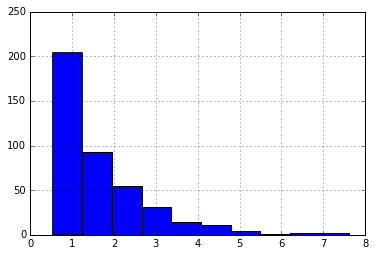

In [5]:
fluTrain.ILI.hist()

#### 1.3  When handling a skewed dependand variable, it is oftemn useful to predict the logarithm of the dependant variable instaed of the depeandant variable itself. This prevents the small number of unusually large or small observations from having an undue effect on the sum of squared errors of predictive models .In this problem we will predict the natural log of the ILI variable. Plot the natural log of ILI vs Queries. what does it suggest?

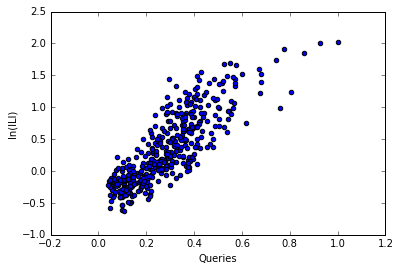

In [6]:
import math
fluTrain["ILI_aslog"]= fluTrain.ILI.apply(lambda x:math.log(x))
plt.scatter(fluTrain.Queries, fluTrain.ILI_aslog)
plt.xlabel("Queries")
plt.ylabel("ln(ILI)")
plt.show()

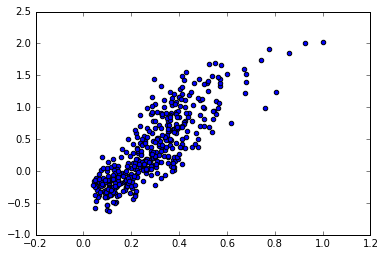

In [7]:
#I can plot using the np function!! as well-so no need to do sapply..
plt.scatter(fluTrain.Queries, np.log(fluTrain.ILI))

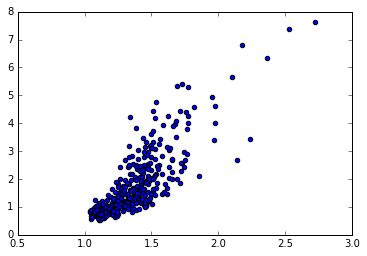

In [8]:
plt.scatter(np.exp(fluTrain.Queries), fluTrain.ILI)

#### 2.1  Based on the above plot, it seems a Linear regression model may be a modelling choice . A possible model would be of the form:
log(ILI)=intercept+(coeff_X)(Queries) ; where coeff_X is +ve.

#### 2.2 Run the above regression model. What is the R-squared? 

In [9]:
model1=smf.ols(formula="np.log(ILI)~Queries",data=fluTrain)
#model1=smf.ols(formula="ILI_aslog ~ Queries",data=fluTrain)

In [10]:
fitted=model1.fit()
#estimated values are given by fitted.fittedvalues
fitted.fittedvalues

0      0.204603
1      0.153478
2      0.169209
3      0.204603
4      0.165276
5      0.114151
6      0.216400
7      0.141680
8      0.169209
9      0.090555
10    -0.102145
11    -0.090347
12    -0.082482
13    -0.255519
14    -0.275182
15    -0.286980
16    -0.302711
17    -0.318441
18    -0.361700
19    -0.361700
20    -0.353835
21    -0.345970
22    -0.334172
23    -0.318441
24    -0.298778
25    -0.357768
26    -0.345970
27    -0.373498
28    -0.361700
29    -0.349902
         ...   
387    0.181007
388    0.129882
389    0.098421
390    0.047296
391    0.063027
392    0.074825
393    0.137747
394    0.133815
395    0.110219
396    0.141680
397    0.157411
398    0.137747
399    0.239996
400    0.334380
401    0.416966
402    0.597868
403    0.715848
404    0.668656
405    0.617532
406    0.660791
407    0.680454
408    0.700118
409    0.759107
410    0.849559
411    0.723714
412    0.916414
413    0.877087
414    0.920347
415    1.093384
416    1.333276
dtype: float64

####2.3 For a single variable linear regression model, there is a direct relationship between theR-squared and correlation between independant variable (Queries) and the dependant variable (log(ILI)).

In [11]:
fluTrain.corr()

,ILI,Queries,ILI_aslog
ILI,1.000000,0.814212,0.945168
Queries,0.814212,1.000000,0.842033
ILI_aslog,0.945168,0.842033,1.000000


In [12]:
## See that:
0.842033*0.842033

0.7090195730890001

#### 3.1 Performance on the test set:
Get the test set predictions:
What is our estimate for the percentag of II related physician visits in the week id March 11?

In [13]:
#First load the test set:
test=pd.read_csv("FluTest.csv",parse_dates=True)
test.head()
#SInce the predicted values are Ln(ILI); to get the 
#actual ILI values we need to take the exponent.
#predict_test =[math.exp(i) for i in fitted.predict(test)]
#For all such cases- it is easier if you use numpy. Note you can use thsi formalism for a dataSeries
test['predict_test']=np.exp(fitted.predict(test))

In [14]:
test[test.Week=='2012-03-11 - 2012-03-17']

,Week,ILI,Queries,predict_test
10,2012-03-11 - 2012-03-17,2.293422,0.432935,2.187378


####3.2 Performance on the Test Set:
What is the relative error between the observed and estimate for that week.
Note that the relative error is calculated as:
(Obs ILI-Est ILI)/(Obs ILI)

In [15]:
(test.ILI[10]-test.predict_test[10])/test.ILI[10]

0.046238266364746414

####3.3 What is the RMSE between our estimates and the the actual observations for the percentage of ILI related physician visits 

In [16]:
SSE=((test.predict_test - test.ILI)**2).sum()
nrow,ncol=test.shape
RMSE=math.sqrt(SSE/nrow)
RMSE

0.7490645271019656

### 4.1 Training a Time Series Model:
The observations in this dataset are consecutive weekly measurements of the dependant and independant variable.This sort of dataset is called a "time-series". Often Statistical models can be improved by predicting current valueof the dependant variable using past values.
First we need to decide on the amount of time to lag the obseravtions.Since most the ILI data has a 1-2 week lag- we need will use data from 2 weeks ago and earlier. How many values are missing from this variable   

In [17]:
#So basically this means the this week's data will be available 2 weeks from now.
#Do this using the shift command in pandas 

In [18]:
fluTrain["ILI_lag2"]=fluTrain.ILI.shift(2)

In [19]:
fluTrain.ILI_lag2[0:10]

0         NaN
1         NaN
2    2.418331
3    1.809056
4    1.712024
5    1.542495
6    1.437868
7    1.324274
8    1.307257
9    1.036977
Name: ILI_lag2, dtype: float64

In [20]:
sum(fluTrain.ILI_lag2.isnull())

2

####4.2 Training a Time series model
plot the log of ILI_lag2 vs log IL1. What is the relationship? 

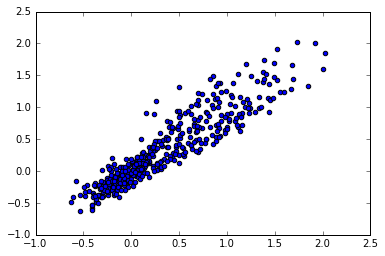

In [21]:
plt.scatter(np.log(fluTrain.ILI_lag2),np.log(fluTrain.ILI))
plt.xlabel="ILI"
plt.ylabel="ILI_lag2"
plt.show()

#### 4.3 Train a  Linear Regression model on the FluTrain dataset to predict log(ILI) using Queries and log(ILI_lag2) variable. Which coefficients are significant? What is the R-squared.

In [22]:
FluTrend2=smf.ols(formula='np.log(ILI)~Queries+np.log(ILI_lag2)',data=fluTrain)
fitted2=FluTrend2.fit()
fitted2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(ILI)   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     1993.
Date:                Sat, 03 Sep 2016   Prob (F-statistic):          1.38e-212
Time:                        20:29:30   Log-Likelihood:                 147.24
No. Observations:                 415   AIC:                            -288.5
Df Residuals:                     412   BIC:                            -276.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           -0.2406      0.020    -12.321      0.000        -0.279    -0.202
Queries              1.2558      0.079     15.876      0.000         1.100     1.411
np.log(ILI_lag2)     0.6557      0.023     29.135      0.000         0.611     0.700
==============================================================================
Omnibus:                       74.791   Durbin-Watson:                   0.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.402
Skew:                           0.950   Prob(JB):                     2.43e-35
Kurtosis:                       5.368   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####Problem 4.4 Training a Time series model.
What can you say about the strength of this model?

####Evaluating the Time Series model in the Test Set:
Modify the code from the previous subproblem to add a lag to the ILI variable in the test set. How many missing variables are there?

In [23]:
test['ILI_lag2']=test.ILI.shift(2)
test.ILI_lag2.head()

0         NaN
1         NaN
2    1.766707
3    1.543401
4    1.647615
Name: ILI_lag2, dtype: float64

#### 5.2 Evaluating the Times series model. 
Note that in this case the training a nd test sets are split sequentially. The training set contains data from 2004-2011. and testing set contains data from 2012.Theer is no time gap between the two datasets, meaning the first observation in the Flu test was recorded one weeek after theb last observation in FluTrain. so we can identify how to fill in the missing values of ILI_lag2 in the Flu test data set.
which observations should we use?

we should use the last two ILI values in fluTrain  as the first two values in fluTest.


####5.3 Evaluating the Times series model. 
Fill in the missing values in FluTest.

In [24]:
test.head()

,Week,ILI,Queries,predict_test,ILI_lag2
0,2012-01-01 - 2012-01-07,1.766707,0.593625,3.520332,NaN
1,2012-01-08 - 2012-01-14,1.543401,0.499336,2.662689,NaN
2,2012-01-15 - 2012-01-21,1.647615,0.500664,2.673181,1.766707
3,2012-01-22 - 2012-01-28,1.684297,0.479416,2.510160,1.543401
4,2012-01-29 - 2012-02-04,1.863542,0.471448,2.451624,1.647615


In [25]:
fluTrain.tail()

,Week,ILI,Queries,ILI_aslog,ILI_lag2
412,2011-11-27 - 2011-12-03,1.465723,0.478088,0.382349,1.462212
413,2011-12-04 - 2011-12-10,1.518106,0.464807,0.417464,1.655415
414,2011-12-11 - 2011-12-17,1.663954,0.479416,0.509197,1.465723
415,2011-12-18 - 2011-12-24,1.852736,0.537849,0.616663,1.518106
416,2011-12-25 - 2011-12-31,2.124130,0.618858,0.753362,1.663954


In [26]:
test.ILI_lag2[0]=fluTrain.ILI[415]
test.ILI_lag2[1]=fluTrain.ILI[416]

/Users/priyadesai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/priyadesai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [27]:
test.head()

,Week,ILI,Queries,predict_test,ILI_lag2
0,2012-01-01 - 2012-01-07,1.766707,0.593625,3.520332,1.852736
1,2012-01-08 - 2012-01-14,1.543401,0.499336,2.662689,2.124130
2,2012-01-15 - 2012-01-21,1.647615,0.500664,2.673181,1.766707
3,2012-01-22 - 2012-01-28,1.684297,0.479416,2.510160,1.543401
4,2012-01-29 - 2012-02-04,1.863542,0.471448,2.451624,1.647615


#### 5.4 Evaluating the Times series model.
Obtain the test set predictions of the ILI variable from FluTrend2. what is the test-ste RSME. whuch model is better?

In [28]:
#having trouble getting predict to work..so use brute force instaed:
A0=fitted2.params[0]
Q0=fitted2.params[1]
Q1=fitted2.params[2]
test['predict_test']=np.exp(A0+Q0*(test.Queries)+Q1*(np.log(test.ILI_lag2)))

In [29]:
test.head()
RMSE_test=math.sqrt(((test.predict_test-test.ILI)**2).mean())

In [30]:
RMSE_test

0.2942028535866688

RMSE using second model is 0.2942 compared to 0.749 of earlier model- so it is significantly better,